# FInding which weight is weird in single Categorization output

In [1]:
import uproot
import mplhep as hep
import matplotlib.pyplot as plt
import numpy as np

In [89]:
file = "/scratch/cuisset/cmt/MergeCategorization/ul_2016_ZbbHtt_v12/ZprimeToZH_ZToBB_HToTauTau_M5000/cat_ZbbHtt_elliptical_cut_90/prod_240430/data_0.root"
t = uproot.open(file + ":Events")
t.keys()

['bunchCrossing',
 'event',
 'luminosityBlock',
 'nElectron',
 'nFatJet',
 'nGenPart',
 'nJet',
 'nLHEPdfWeight',
 'nLHEReweightingWeight',
 'nLHEScaleWeight',
 'nMuon',
 'nPSWeight',
 'nTau',
 'nTauProd',
 'run',
 'Electron_eta',
 'Electron_mass',
 'Electron_phi',
 'Electron_pt',
 'FatJet_eta',
 'FatJet_mass',
 'FatJet_phi',
 'FatJet_pt',
 'GenPart_eta',
 'GenPart_genPartIdxMother',
 'GenPart_mass',
 'GenPart_pdgId',
 'GenPart_phi',
 'GenPart_pt',
 'GenPart_status',
 'GenPart_statusFlags',
 'GenPart_vx',
 'GenPart_vy',
 'GenPart_vz',
 'Jet_btagDeepFlavB',
 'Jet_btagDeepFlavCvB',
 'Jet_btagDeepFlavCvL',
 'Jet_btagDeepFlavQG',
 'Jet_eta',
 'Jet_mass',
 'Jet_phi',
 'Jet_pt',
 'L1PreFiringWeight_Dn',
 'L1PreFiringWeight_ECAL_Dn',
 'L1PreFiringWeight_ECAL_Nom',
 'L1PreFiringWeight_ECAL_Up',
 'L1PreFiringWeight_Muon_Nom',
 'L1PreFiringWeight_Muon_StatDn',
 'L1PreFiringWeight_Muon_StatUp',
 'L1PreFiringWeight_Muon_SystDn',
 'L1PreFiringWeight_Muon_SystUp',
 'L1PreFiringWeight_Nom',
 'L1PreFi

In [90]:
weights = ["genWeight", "puWeight", "DYstitchEasyWeight", "prescaleWeight", 
        "trigSF", "idAndIsoAndFakeSF", "PUjetID_SF", "L1PreFiringWeight_Nom",
        "bTagweightReshape"]


In [91]:
ar = t.arrays(filter_name=weights + ["event", "luminosityBlock", "run", "pairType"])
ar

<Array [{event: 22339, ...}, {...}, ..., {...}] type='10 * {event: uint64, ...'>

In [92]:
for weight in weights:
    print(f"{weight} : min={np.min(ar[weight])}, max={np.max(ar[weight])}")

genWeight : min=1.0, max=1.0
puWeight : min=0.9473543167114258, max=1.1363180875778198
DYstitchEasyWeight : min=1, max=1
prescaleWeight : min=1.0, max=1.0
trigSF : min=0.9129418730735779, max=0.9981091554211953
idAndIsoAndFakeSF : min=0.8461220785835089, max=1.1222992336266842
PUjetID_SF : min=0.9427341368750676, max=1.0
L1PreFiringWeight_Nom : min=0.3681640625, max=1.0
bTagweightReshape : min=0.6549734829042095, max=1.3525764500972828


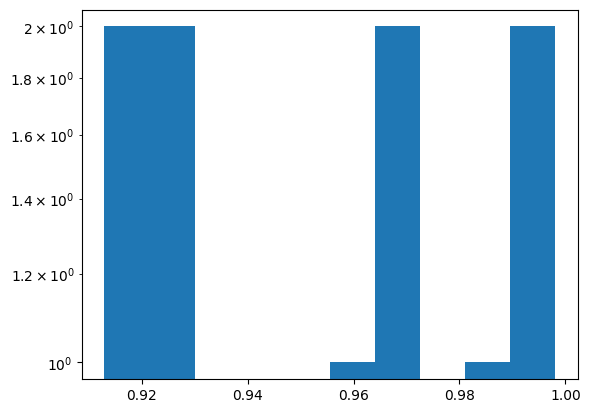

In [93]:
plt.hist(ar.trigSF)
plt.yscale("log")

In [94]:
ar[ar.trigSF > 1000]

<Array [] type='0 * {event: uint64, luminosityBlock: uint32, run: uint32, L...'>

In [99]:
filter_list = []
for evt in ar[ar.trigSF > 100]:
    filter_list.append(f"(event == {evt.event} && luminosityBlock == {evt.luminosityBlock})")
sel = "||".join(filter_list)
sel

''

In [96]:
print(f"""
rdf = ROOT::RDataFrame("Events", "{file}")
rdf.Filter("!({sel})").Snapshot("Events", "{file.replace(".root", "_fixed.root")}")
""")


rdf = ROOT::RDataFrame("Events", "/scratch/cuisset/cmt/MergeCategorization/ul_2016_ZbbHtt_v12/ZprimeToZH_ZToBB_HToTauTau_M5000/cat_ZbbHtt_elliptical_cut_90/prod_240430/data_0.root")
rdf.Filter("!()").Snapshot("Events", "/scratch/cuisset/cmt/MergeCategorization/ul_2016_ZbbHtt_v12/ZprimeToZH_ZToBB_HToTauTau_M5000/cat_ZbbHtt_elliptical_cut_90/prod_240430/data_0_fixed.root")



In [97]:
print(f"""
rm {file}
mv {file.replace(".root", "_fixed.root")} {file}
""")


rm /scratch/cuisset/cmt/MergeCategorization/ul_2016_ZbbHtt_v12/ZprimeToZH_ZToBB_HToTauTau_M5000/cat_ZbbHtt_elliptical_cut_90/prod_240430/data_0.root
mv /scratch/cuisset/cmt/MergeCategorization/ul_2016_ZbbHtt_v12/ZprimeToZH_ZToBB_HToTauTau_M5000/cat_ZbbHtt_elliptical_cut_90/prod_240430/data_0_fixed.root /scratch/cuisset/cmt/MergeCategorization/ul_2016_ZbbHtt_v12/ZprimeToZH_ZToBB_HToTauTau_M5000/cat_ZbbHtt_elliptical_cut_90/prod_240430/data_0.root



Masses : 800, 1000, 1200, 1400, 2000
rm -r /grid_mnt/data__data.polcms/cms/cuisset/cmt/PrePlot/ul_2016_ZbbHtt_v12/ZprimeToZH_ZToBB_HToTauTau_M800/cat_ZbbHtt_elliptical_cut_90/prod_240510/